You can access our notebook on colab using this link:  
 [https://colab.research.google.com/drive/1-erXXtaSDM4IM0mw9eNLFyNNCWqMUxYi?usp=sharing](https://colab.research.google.com/drive/1-erXXtaSDM4IM0mw9eNLFyNNCWqMUxYi?usp=sharing)

# Importing Libraries

In [1]:
import sklearn
import os
import pandas as pd
import numpy as np

Cloning git repository related to this project. Crawled data and Crawler code are available in git repository.

In [2]:
!git clone https://github.com/tandalalam/saadi-retreival.git

Cloning into 'saadi-retreival'...
remote: Enumerating objects: 605, done.
remote: Counting objects: 100% (605/605), done.
remote: Compressing objects: 100% (595/595), done.
remote: Total 605 (delta 29), reused 567 (delta 7), pack-reused 0
Receiving objects: 100% (605/605), 625.78 KiB | 6.80 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
os.chdir('saadi-retreival')

Reading Boostan from file:

In [4]:
boostan_data = list()
for chapter_name in os.listdir('boostan'):
    for file_name in os.listdir(f'boostan/{chapter_name}'):
        file = open(f'boostan/{chapter_name}/{file_name}')
        poem = file.read()
        for hem in [x.strip() for x in poem.split('\n\n')]:
            if hem:
                boostan_data.append([hem, int(chapter_name.split('bab')[1]), int(file_name.split('sh')[1].split('.')[0])])

In [5]:
boostan_data = pd.DataFrame(boostan_data)

In [6]:
boostan_data.columns = ['poem', 'chapter', 'section']

In [7]:
boostan_data.sort_values(by=['chapter', 'section'], ignore_index=True, inplace=True)

In [8]:
boostan_data

,poem,chapter,section
0,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفرین,0,1
1,خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش‌پذیر,0,1
2,عزیزی که هر کز درش سر بتافت\nبه هر در که شد هی...,0,1
3,سر پادشاهان گردن‌فراز\nبه درگاه او بر زمین نیاز,0,1
4,نه گردن‌کشان را بگیرد به فور\nنه عذرآوران را ب...,0,1
...,...,...,...
4059,به کردار بدشان مقید نکرد\nبضاعات مزجاتشان رد نکرد,10,4
4060,ز لطفت همین چشم داریم نیز\nبر این بی‌بضاعت ببخ...,10,4
4061,کس از من سیه نامه تر دیده نیست\nکه هیچم فعال پ...,10,4
4062,جز این کاعتمادم به یاری تست\nامیدم به آمرزگاری...,10,4


Reading Golestan from file:

In [9]:
import re

We will split Golestan's NASR based on their punctiuation:

In [10]:
golestan_data = list()
for chapter_name in os.listdir('golestan'):
    for file_name in os.listdir(f'golestan/{chapter_name}'):
        file = open(f'golestan/{chapter_name}/{file_name}')
        for hem in [x.strip() for x in re.split('\n\n|\.|\?|!', file.read())]:
            if len(hem.split()) < 3:
              continue
            if hem:
                if file_name.startswith('d'):
                    golestan_data.append([hem, 0, 1])
                else:
                    golestan_data.append([hem, int(chapter_name.split('bab')[1]), int(file_name.split('sh')[1].split('.')[0])])

In [11]:
golestan_data = pd.DataFrame(golestan_data)

In [12]:
golestan_data.columns = ['poem', 'chapter', 'section']

In [13]:
golestan_data.sort_values(by=['chapter', 'section'], ignore_index=True, inplace=True)

In [14]:
golestan_data

,poem,chapter,section
0,بِسم اللهِ الرَّحمنِ الرَّحیم,0,1
1,منّت خدای را عز و جل که طاعتش موجب قربت است و ...,0,1
2,هر نفسی که فرو می رود ممدّ حیات است و چون بر م...,0,1
3,پس در هر نفسی دو نعمت موجود است و بر هر نعمتی ...,0,1
4,از دست و زبان که بر آید\nکز عهدهٔ شکرش به در آید,0,1
...,...,...,...
2497,غالب گفتار سعدی طرب انگیز است و طیبت آمیز و کو...,8,109
2498,ما نصیحت به جای خود کردیم\nروزگاری در این به س...,8,109
2499,گر نیاید به گوش رغبت کس\nبر رسولان پیام باشد و بس,8,109
2500,یا ناظراً فیه سَل باللهِ مرحمةً\nعلی المصنفِ و...,8,109


Concatanating data from Boostan and Golestan:

In [15]:
all_data = pd.concat([boostan_data, golestan_data], ignore_index=True)['poem']

In [16]:
!pip3 install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 27.5 MB/s 
     |████████████████████████████████| 1.4 MB 56.9 MB/s 
     |████████████████████████████████| 233 kB 65.0 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=0c3c3b33de4e70e7ee9c95a32f255f13d7c1d94b68e0499854b225bfa78516bc
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153888 sha256=95d715252886aee8e5be6c56f73b21efbf6f7fc8ed59cb105ad7f3feb4871608
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [17]:
from __future__ import unicode_literals
from hazm import *
import tqdm
import string

Importing stopwords and words that should be replaced:  
We have use stop-words for persian poems from [here](https://github.com/amnghd/Persian_poems_corpus). And word that should replaced are written by ourselves.

In [18]:
stopwords = ['زن']
replace_dict = {}
punctuations = '\.:!،؛؟»\]\)\}«\[\(\{' + string.punctuation

with open('stopwords.txt') as f:
    var = f.readline()
    while var:
        stopwords.append(var.strip())
        var = f.readline()

with open('replace.txt') as f:
    line = f.readline()
    while line:
        key, value = line.split('-')
        key, value = key.strip(), value.strip()
        replace_dict[f'{key}'] = f'{value}'
        line = f.readline()

# Preprocessing Data

In [19]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def replace_function(string):
    if string in replace_dict:
      return replace_dict[string]
    return string

def sent_pre_process(sentence, normalize=True, remove_stopwords=False, stemme=False, lemmatize=True, replace=True, remove_punctuations=True, is_first=True):

    # replace some charachters
    replace_char = {'هٔ': 'ه',
                    'ۀ' : 'ه',
                    'ه‌ی' : 'ه'}
    
    if remove_punctuations:
      for char in punctuations:
        replace_char[char] = " "

    for key, value in replace_char.items():
        sentence = sentence.replace(key, value)

    if normalize:
        sentence = normalizer.normalize(sentence)
    if stemme:
        sentence = stemmer.stemme(sentence)
    if lemmatize:
        sentence = lemmatizer.lemmatize(sentence)
    

    tokens = word_tokenize(sentence)
    
    if replace:
        tokens = [replace_function(token) for token in tokens]
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stopwords]
    
    if is_first:
        return sent_pre_process(" ".join(tokens), normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, False)
    
    return tokens

def pre_process(sentences, normalize=True, remove_stopwords=False, stemme=False, lemmatize=True, replace=True, remove_punctuations=True, is_first=True, MIN_COUNT=3, put_index=False):
    if put_index:
        processed = [(sent_pre_process(sent, normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, is_first), i) for i, sent in enumerate(sentences)]
        return [t for t in processed if len(list(t[0])) > MIN_COUNT]
    processed = [sent_pre_process(sent, normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, is_first) for sent in sentences]
    return [t for t in processed if len(list(t)) > MIN_COUNT]

# Boolean Retreival

For convinience, we use CountVectorizer and then convert its values from number to boolean to get boolean retreival matrix:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tf_data = tf.fit_transform(all_data)
tf_data = tf_data.toarray().astype(bool)

In [21]:
tf.transform(['ما ز یاران چشم یاری']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [22]:
tf_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
def boolean_retrieval(str, k=10):
  query_vec = tf.transform([str]).toarray()[0]
  scores = np.dot(tf_data, query_vec)
  args = np.argsort(scores)[::-1]
  k_args = args[:k]
  return np.concatenate([[scores[k_args]], [all_data[k_args]]]).T

In [24]:
boolean_retrieval('به نام خداوند جان و خرد کز این برتر اندیشه بر نگذرد')

array([[2, 'اگر باد سرد نفس نگذرد\nتف معده جان در خروش آورد'],
       [1,
        'به نام خداوندِ جان\u200cآفرین\nحکیمِ سخن\u200cدرزبان\u200cآفرین'],
       [1,
        'در این کشور اندیشه کردم بسی\nپریشان\u200cتر از خود ندیدم کسی'],
       [1, 'عجب آن که غراب از مجاورت طوطی هم به جان آمده بود و ملول شده'],
       [1, 'هر آن کس که جور بزرگان نبرد\nنسوزد دلش بر ضعیفان خرد'],
       [1,
        'که درمانده\u200cام دست گیر ای صنم\nبه جان آمدم رحم کن بر تنم'],
       [1,
        'یکی را زنی صاحب جمال جوان درگذشت و مادرزن فرتوت به علت کابین در خانه متمکن بماند و مرد از محاورت او به جان رنجیدی و از مجاورت او چاره ندیدی تا گروهی آشنایان به پرسیدن آمدندش'],
       [1,
        'چو الب ارسلان جان به جان\u200cبخش داد\nپسر تاج شاهی به سر برنهاد'],
       [1, 'ز دوران ملک پدر یاد کن\nدل از بند اندیشه آزاد کن'],
       [1, 'وگر راست گفت ای خداوند پاک\nمرا توبه ده تا نگردم هلاک']],
      dtype=object)

We can train a retreival system that returns the whole related poem (file) instead of only one MESRAA or BEIT just as easily:

In [25]:
# setting book column for both golestan and boostan:
golestan_data['book'] = 'Golestan'
boostan_data['book'] = 'Boostan'

In [26]:
df = pd.concat([boostan_data, golestan_data], ignore_index=True)
all_data = df['poem']
file_based_df = df.groupby(['book', 'chapter', 'section']).apply(lambda f: ' '.join(f['poem'].tolist())).reset_index()
file_based_df.columns = ['book', 'chapter', 'section', 'poem']
file_based_df.head()

,book,chapter,section,poem
0,Boostan,0,1,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفر...
1,Boostan,0,2,کریم السجایا جمیل الشیم\nنبی البرایا شفیع الام...
2,Boostan,0,3,در اقصای عالم بگشتم بسی\nبه سر بردم ایام با هر...
3,Boostan,0,4,مرا طبع از این نوع خواهان نبود\nسر مدحت پادشاه...
4,Boostan,0,5,اتابک محمد شه نیکبخت\nخداوند تاج و خداوند تخت ...


In [27]:
file_base_tf = CountVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
file_base_tf_data = file_base_tf.fit_transform(file_based_df.poem)
file_base_tf_data = file_base_tf_data.toarray().astype(bool)

def file_base_boolean_retrieval(str, k=10):
  query_vec = file_base_tf.transform([str]).toarray()[0]
  scores = np.dot(file_base_tf_data, query_vec)
  args = np.argsort(scores)[::-1]
  k_args = args[:k]
  return np.concatenate([[scores[k_args]], [file_based_df.poem[k_args]]]).T

In [28]:
file_base_boolean_retrieval('به نام خداوند جان و خرد کز این برتر اندیشه بر نگذرد', k=1)

array([[4,
        'بِسم اللهِ الرَّحمنِ الرَّحیم منّت خدای را عز و جل که طاعتش موجب قربت است و به شکر اندرش مزید نعمت هر نفسی که فرو می رود ممدّ حیات است و چون بر می آید مفرّح ذات پس در هر نفسی دو نعمت موجود است و بر هر نعمتی شکری واجب از دست و زبان که بر آید\nکز عهدهٔ شکرش به در آید اِعملوا آلَ داودَ شکراً وَ قلیلٌ مِن عبادیَ الشکور بنده همان به که ز تقصیر خویش\nعذر به درگاه خدای آورد ور نه سزاوار خداوندیش\nکس نتواند که به جای آورد باران رحمت بی حسابش همه را رسیده و خوان نعمت بی دریغش همه جا کشیده پردهٔ ناموس بندگان به گناه فاحش ندرد و وظیفهٔ روزی به خطای منکر نبرد ای کریمی که از خزانهٔ غیب\nگبر و ترسا وظیفه خور داری دوستان را کجا کنی محروم\nتو که با دشمن این نظر داری فرّاش باد صبا را گفته تا فرش زمرّدی بگسترد و دایهٔ ابر بهاری را فرموده تا بنات نبات در مهد زمین بپرورد درختان را به خلعت نوروزی قبای سبز ورق در بر گرفته و اطفال شاخ را به قدوم موسم ربیع کلاه شکوفه بر سر نهاده عصاره نالی به قدرت او شهد فایق شده و تخم خرمایی به تربیتش نخل باسق گشته ابر و باد و مه و خورشید و فلک در کارند\n

And we can use this to create our file-based retreival system for all our models. But in this notebook, our main retreival systems are retreiving BEITs.

# TF-IDF Retreival

Defining cosine function to compute cosine of angle between two vectors in space:


In [29]:
def get_cosine(v1,v2):
    return np.inner(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

get_most_similars returns k most similar vectos to query_vector based on similarity_func:


In [30]:
def get_most_similars(document_vectors, query_vector, similarity_func, k=10):
    tops = list()
    for i, vec in enumerate(document_vectors):
        similarity = similarity_func(query_vector, vec)
        if not np.isnan(similarity):
          tops.append([similarity, all_data[i]])
    tops = np.array(tops)
    args = np.argsort(tops[:, 0])[::-1]
    return list(tops[args[:k]])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_data = tfidf.fit_transform(all_data)
tfidf_data = tfidf_data.toarray()

In [32]:
tfidf_data.shape

(6566, 10796)

In [33]:
def tfidf_retrieval(str, k=10):
  tfidf_str = tfidf.transform([str]).toarray()[0]
  return pd.DataFrame(get_most_similars(tfidf_data, tfidf_str, get_cosine, k))

In [34]:
tfidf_retrieval('دلم خانه‌ی مهر یار است و بس', k=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,0,1
0,0.6832235115151075,دلم خانهٔ مهر یار است و بس\nاز آن می‌نگنجد در ...
1,0.5413772731987289,گفت: ای یاران
2,0.5413772731987289,گفت: ای یار
3,0.3613019833857258,گفت: ای یار عزیز
4,0.3241967627414958,خرابت کند شاهد خانه کن\nبرو خانه آباد گردان به زن
5,0.30932197746696155,یکی از لوازم صحبت آن است که خانه بپردازی یا با...
6,0.2855158030134369,رهی رو که بینی طریق رجا\nتو و مهر شمع از کجا ت...
7,0.2754478022726963,بر سر لوح او نبشته به زر\nجور استاد به ز مهر پدر
8,0.27440282720818304,منجمی به خانه در آمد
9,0.26910487285512996,صاحب دعوت گفت: ای یار


# Transformer-based Model

For this part, we create a model based on [Pars-BERT](https://github.com/hooshvare/parsbert), a pretrained transformer model based on BERT.

In [35]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.7 MB/s 
     |████████████████████████████████| 4.7 MB 50.3 MB/s 
     |████████████████████████████████| 1.2 MB 62.9 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d973676944e63980443e8f17a711fcfb58839e8f78ab14900a9a2ba4b264f46b
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [36]:
import sentence_transformers as st
import itertools

In [37]:
class my_transformer:
    def __init__(self, document):
        self.data = document
        self.x = st.models.Transformer('HooshvareLab/bert-fa-zwnj-base')
        self.model = st.SentenceTransformer(modules=[self.x, st.models.Pooling(self.x.get_word_embedding_dimension())])
        self.processed_data = pre_process(self.data, remove_stopwords=True, put_index=True, MIN_COUNT=0)
        self.processed_data_index = [(' '.join(x[0]), x[1]) for x in self.processed_data]
        self.processed_data = [' '.join(x[0]) for x in self.processed_data]
        self.vectors = self.model.encode(self.processed_data)
    
    def search(self, query, k=10):
        pre_processed_query = sent_pre_process(query, remove_stopwords=True)
        joint_processed_query = ' '.join(pre_processed_query)
        tops = list()
        query_encode = self.model.encode(joint_processed_query)
        sims = st.util.cos_sim(query_encode, self.vectors).numpy()[0]
        indexes = np.argsort(sims)[::-1][:k]
        tops = list()
        for ind in indexes:
            tops.append((sims[ind], self.data[self.processed_data_index[ind][1]]))
        return tops

In [38]:
transformer_model = my_transformer(all_data)

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

In [39]:
transformer_model.search('به نام خداوند جان آفرین')

[(0.7865952, 'زهی بندگان را خداوندگار\nخداوند را بندهٔ حق گزار'),
 (0.78360313, 'گناه آید از بندهٔ خاکسار\nبه امید عفو خداوندگار'),
 (0.7790895, 'پس ای مرد پوینده بر راه راست\nتو را نیست منت، خداوند راست'),
 (0.7755697, 'چو باز آمد از عیش و شادی به جای\nمرا دید و گفت ای خداوند رای'),
 (0.774552, 'گفت: ای خداوند جهان'),
 (0.7660398, 'پدر بعد از آن، روزگاری شمرد\nبه جان آفرین جان شیرین سپرد'),
 (0.7621521, 'گفت: ای خداوند روی زمین'),
 (0.7621521, 'گفت: ای خداوند روی زمین'),
 (0.75773597, 'گفت: ای خداوند'),
 (0.75773597, 'گفت: ای خداوند')]

# Word Embedding

We'll use Word2Vec as our model for for Word Embedding:

In [40]:
from gensim.models import Word2Vec

In [41]:
def get_all_words(document):
    all_words = {}
    for line in pre_process(document['poem'], remove_stopwords=True):
        for w in line:
            if w not in all_words:
                all_words[w] = 0
            all_words[w] += 1
    return all_words

In [42]:
print(pre_process(boostan_data['poem']))

[['به', 'نام', 'خداوند', 'جان\u200cآفرین', 'حکیم', 'سخن\u200cدرزبان\u200cآفرین'], ['خداوند', 'بخشنده', 'دستگیر', 'کریم', 'خطابخش', 'پوزش\u200cپذیر'], ['عزیزی', 'که', 'هر', 'که', 'از', 'درش', 'سر', 'بتافت', 'به', 'هر', 'در', 'که', 'شد', 'هیچ', 'عزت', 'نیافت'], ['سر', 'پادشاهان', 'گردن\u200cفراز', 'به', 'درگاه', 'او', 'بر', 'زمین', 'نیاز'], ['نه', 'گردن\u200cکشان', 'را', 'بگیرد', 'به', 'فور', 'نه', 'عذرآوران', 'را', 'براند', 'به', 'جور'], ['وگر', 'خشم', 'گیرد', 'از', 'کردار', 'زشت', 'چون', 'بازآمدی', 'ماجرا', 'درنوشت'], ['اگر', 'با', 'پدر', 'جنگ', 'جوید', 'کسی', 'پدر', 'بی\u200cگمان', 'خشم', 'گیرد', 'بسی'], ['وگر', 'خویش', 'راضی', 'نباشد', 'از', 'خویش', 'چون', 'بیگانگانش', 'براند', 'از', 'پیش'], ['وگر', 'بنده', 'چابک', 'نباشد', 'به', 'کار', 'عزیزش', 'ندارد', 'خداوندگار'], ['وگر', 'بر', 'رفیقان', 'نباشی', 'شفیق', 'به', 'فرسنگ', 'بگریزد', 'از', 'تو', 'رفیق'], ['وگر', 'ترک', 'خدمت', 'کند', 'لشکری', 'شود', 'شاه', 'لشکرکش', 'از', 'او', 'بری'], ['ولیکن', 'خداوند', 'بالا', 'و', 'پست', 'به', 'عص

In [43]:
import itertools

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

idf = TfidfTransformer(smooth_idf=True,use_idf=True) 
idf.fit(tf_data);

In [45]:
idf_data = idf.idf_
idf_data.shape
idf_dataframe = pd.Series(idf_data, index=tf.get_feature_names())
idf_dataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


آب        5.370972
آبت       8.691200
آبدان     9.096665
آبروی     7.391917
آبرویش    8.691200
dtype: float64

In [46]:
class my_word2vec:
    def __init__(self, document):
        self.data = document
        # all_words = get_all_words(document)
        x = pre_process(document, remove_stopwords=True)
        self.model = Word2Vec(x)

    def get_most_similar_word_to_word(self, word):
        return self.model.wv.most_similar(word)

    def get_similarity(self, query, line):
        pre_processed_query = sent_pre_process(query, remove_stopwords=True)
        pre_processed_line = sent_pre_process(line, remove_stopwords=True)
        query_vector = self.word_summation(pre_processed_query)
        line_vector = self.word_summation(pre_processed_line)
        return get_cosine(query_vector, line_vector)

    def word_summation(self, sent):
        vector = np.zeros(self.model.wv.vector_size, dtype=np.float64)
        weight_sum = 0
        for word in sent:
          try:
            weight = idf_dataframe[word]
            vector += self.model.wv[word] * weight
            weight_sum += weight
          except:
            pass
        return vector / weight_sum

    def search(self, sentence, k=10):
        tops = list()
        for line in self.data:
            similarity = self.get_similarity(sentence, line)
            if not np.isnan(similarity):
              tops.append([similarity, line])
        tops = np.array(tops)
        args = np.argsort(tops[:, 0])[::-1]
        return list(tops[args[:k]])

    def get_vec(self, doc):
        return self.model.infer_vector(pre_process(doc)[0])

In [47]:
model = my_word2vec(all_data)

In [48]:
beit = 'به نام خداوند جان و خرد'

In [49]:
for x in model.search(beit):
    print(x[0], x[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


0.9980499127033152 چو بینی دعاگوی دولت هزار
خداوند را شکر نعمت گزار
0.9978839092973407 بگفت ای خداوند ایران و تور
که چشم بد از روزگار تو دور
0.9978504451888222 بر آورد مرد جهاندیده دست
چه گفت ای خداوند بالا و پست
0.9978202730991494 گفت: ای خداوند جهان، پرورده نعمت این خاندانم و این گناه نه تنها من کرده‌ام، دیگری را بینداز تا من عبرت گیرم
0.9977537512585738 اگر به هر سر موییت صد خرد باشد
خرد به کار نیاید چو بخت بد باشد
0.9977508815149112 غافلی را شنیدم که خانه رعیت خراب کردی تا خزانه سلطان آباد کند بی خبر از قول حکیمان که گفته‌اند هر که خدای را عزّ و جلّ بیازارد تا دل خلقی به دست آرد خداوند تعالی همان خلق را بر او گمارد تا دمار از روزگارش بر آرد
0.9977475319604079 چو بینی که لشکر ز هم دست داد
به تنها مده جان شیرین به باد
0.997737437970826 چو بینی زبر دست را زور دست
نه مردی بود پنجهٔ خود شکست
0.9977303529906185 سلطان را دل از این سخن به هم بر آمد و آب در دیده بگردانید و گفت هلاک من اولی تر است از خون بی گناهی ریختن
0.9977302475531957 پس ای مرد پوینده بر راه راست
تو را نیست منت، خداوند را

# MMR and Evaluating Model

In [50]:
dataset_queries = pd.read_csv('HW3-Dataset.csv', names=['query', 'user1', 'user2', 'user3'])
queries = []

In [51]:
for row in dataset_queries['query'].dropna():
    if row.startswith('q'):
        queries.append(row.split('"')[-2])

xlsx_extract, creates a xlxx file for each of four methods, containing 10 responses for each of 10 queries. We will use these files to label our retreived documents.


In [52]:
def xlsx_extract(output, response_dict):
    dataframe_list = []
    i = 1
    for key, value in response_dict.items():
        dataframe_list.append(f'q{i} = "{key}"')
        for sent in value:
            dataframe_list.append(sent)
        i += 1

    df = pd.DataFrame({'query/response': dataframe_list,
                'user1': np.nan,
                'user2': np.nan,
                'user3': np.nan})
    df.to_excel(output, index=False)  

Extracting responses for each of four models:

In [53]:
# boolean_retrieval extract xlsx
response_dict = {}

for query in queries:
    response = boolean_retrieval(query)
    response_dict[query] = []
    for number, sent in response:
        response_dict[query].append(sent)

xlsx_extract('boolean.xlsx', response_dict)

In [54]:
# tfidf_retrieval extract xlsx
response_dict = {}

for query in queries:
    response = tfidf_retrieval(query)
    response_dict[query] = []
    for sent in response[1]:
        response_dict[query].append(sent)

xlsx_extract('tfidf.xlsx', response_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [55]:
queries

['به نام خداوند جان و خرد\nکز این برتر اندیشه بر نگذرد',
 'صورتی بنشینده گشتی ترجمان\nبی\u200cخبر از گفت خود چون طوطیان',
 'تو نیکو روش باش تا بد سگال\nنیابد به نقص تو گفتن مجال',
 'دلم خانهٔ مهر یار است و بس\nاز آن می\u200cنگنجد در او کین کس',
 'عجب ناید از سیرت بخردان\nکه نیکی کنند از کرم با بدان',
 'شب پره گر وصل آفتاب نخواهد\nرونق بازار آفتاب نکاهد',
 'هر که بی او به سر نشاید برد\nگر جفایی کند بباید برد',
 'صبر قفا خورد و به راهی گریخت\nعقل بلا دید و به کنجی نشست',
 'هر که بیفتاد به تیرت نخاست\nوان که درآمد به کمندت نجست\nما به تو یک باره مقید شدیم\nمرغ به دام آمد و ماهی به شست\nصبر قفا خورد و به راهی گریخت\nعقل بلا دید و به کنجی نشست\nبار مذلت بتوانم کشید\nعهد محبت نتوانم شکست\nوین رمقی نیز که هست از وجود\nپیش وجودت نتوان گفت هست',
 'دلم خانهٔ مهر یار است و بس\nاز آن می\u200cنگنجد در او کین کس',
 'ببرد از من قرار و طاقت و هوش\nبت سنگین دل سیمین بناگوش\nنگاری چابکی شنگی کلهدار\nظریفی مه وشی ترکی قباپوش\nز تاب آتش سودای عشقش\nبه سان دیگ دایم می\u200cزنم جوش\nچو پیراهن شوم آسوده خاطر

In [ ]:
# word2vec extract xlsx
response_dict = {}
model = my_word2vec(all_data)

for query in queries:
    response = model.search(query)
    response_dict[query] = []
    for sent in response:
        response_dict[query].append(sent[1])

xlsx_extract('word2vec.xlsx', response_dict)

In [ ]:
# transformer extract xlsx
response_dict = {}
model = my_transformer(all_data)

for query in queries:
    response = model.search(query)
    response_dict[query] = []
    for sent in response:
        response_dict[query].append(sent[1])

xlsx_extract('transformer.xlsx', response_dict)

Computing MRRs:

In [61]:
# MRR

methods = ['boolean', 'tfidf', 'word2vec', 'transformer', 'elastic']

for method in methods:
  df = pd.read_csv(f'labeled-output/{method}-labeled.csv', names=['query', 'user1', 'user2', 'user3'], encoding = "ISO-8859-1")
  user1_vector = np.array(df['user1'])[1:]
  user2_vector = np.array(df['user2'])[1:]
  user3_vector = np.array(df['user3'])[1:]
  score_vector = np.concatenate([user1_vector.reshape([10, 11])[:, 1:],
                    user2_vector.reshape([10, 11])[:, 1:],
                    user3_vector.reshape([10, 11])[:, 1:]])

  score_list = []

  for score in score_vector:
      for i, x in enumerate(score):
          if x == '1':
              score_list.append(1/(i + 1))
              break
          elif i == 9:
              score_list.append(0)

  MRR_score = sum(score_list) / len(score_list)

  print(f'MRR score for method {method} is: {MRR_score:.3f}')

MRR score for method boolean is: 0.667
MRR score for method tfidf is: 0.702
MRR score for method word2vec is: 0.725
MRR score for method transformer is: 0.578
MRR score for method elastic is: 0.836


# Phase 2: Classification and Clustering

## Data Preparation

In [ ]:
data = boostan_data.drop(columns = ['section'])

In [ ]:
data.chapter.value_counts()

1     910
4     524
2     502
7     445
3     365
9     336
8     275
0     219
5     203
6     172
10    113
Name: chapter, dtype: int64

As you can see, our classes are imbalanced and Chapter 1 of boostan has a larger amount of verses in it.

Splitting test and train data:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data['poem']
y = data['chapter']

In [ ]:
#split test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3251,), (813,), (3251,), (813,))

Because we are dealing with an imbalanced classification problem and our main metric is F1 score and True Positives are important to us, we give each class a weight and in our `pytorch` models, use them in CrossEntropyLoss to consider this imbalanceness in training.

In [ ]:
class_weight = data['chapter'].count() / data['chapter'].value_counts()
class_weight

1      4.465934
4      7.755725
2      8.095618
7      9.132584
3     11.134247
9     12.095238
8     14.778182
0     18.557078
5     20.019704
6     23.627907
10    35.964602
Name: chapter, dtype: float64

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Number of Classes that we classify:

In [ ]:
num_class = 11

### Vectorizing data using TF-IDF:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode',
                                    analyzer='char',
                                    preprocessor= lambda x: ' '.join(sent_pre_process(x, normalize=False, remove_stopwords=True, lemmatize=False)),
                                    ngram_range=(2, 6), min_df=4, max_features=15000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
X_train_tfidf.shape, X_test_tfidf.shape

((3251, 15000), (813, 15000))

Defining functions for printing metrics and plotting confusion matrices:

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


def evaluate_model(y, y_pred, name):
    """
    function to evaluate a model
    """
    # evaluate metrics
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro')

    print(f'[{name}] model score: {accuracy}')
    print(f'[{name}] model f1_score: {f1}')
    print(f'[{name}] model precision: {precision}')
    print(f'[{name}] model recall: {recall}')

    # plot confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f'Confusion Matrix ({name})', fontsize=18)
    plt.show()


### Linear SVM Classifier

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(class_weight='balanced')
model.fit(X_train_tfidf, y_train)
pred = model.predict(X_test_tfidf)

[Linear SVM Model] model score: 0.2644526445264453
[Linear SVM Model] model f1_score: 0.2304187699485297
[Linear SVM Model] model precision: 0.22991872458942925
[Linear SVM Model] model recall: 0.2364147050023975


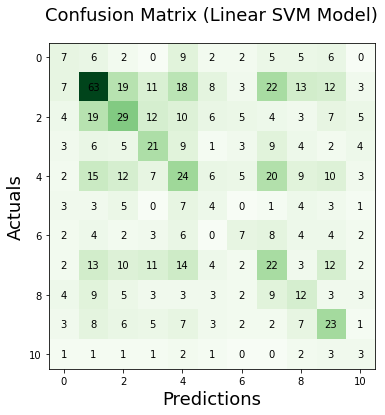

In [ ]:
evaluate_model(y_test, pred, 'Linear SVM Model')

[Linear SVM Model (Train)] model score: 0.9926176561058137
[Linear SVM Model (Train)] model f1_score: 0.9935490195831868
[Linear SVM Model (Train)] model precision: 0.9910013068110177
[Linear SVM Model (Train)] model recall: 0.996174968014456


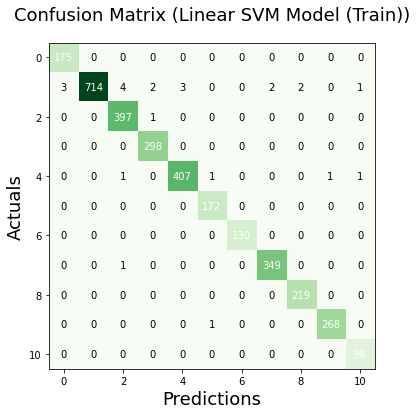

In [ ]:
evaluate_model(y_train, model.predict(X_train_tfidf), 'Linear SVM Model (Train)')

#### DecisionTreeClassifier:
DecisionTreeClassifier is basic tree based classifier in Sklearn llibrary:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, min_samples_split=20, class_weight=class_weight.to_dict())
clf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight={0: 18.557077625570777,
                                     1: 4.465934065934066, 2: 8.095617529880478,
                                     3: 11.134246575342466,
                                     4: 7.755725190839694,
                                     5: 20.019704433497537,
                                     6: 23.627906976744185,
                                     7: 9.132584269662921,
                                     8: 14.778181818181817,
                                     9: 12.095238095238095,
                                     10: 35.9646017699115},
                       min_samples_split=20, random_state=0)

[Test data] model score: 0.13776137761377613
[Test data] model f1_score: 0.13676709147561558
[Test data] model precision: 0.1299006410111492
[Test data] model recall: 0.15403228643967048


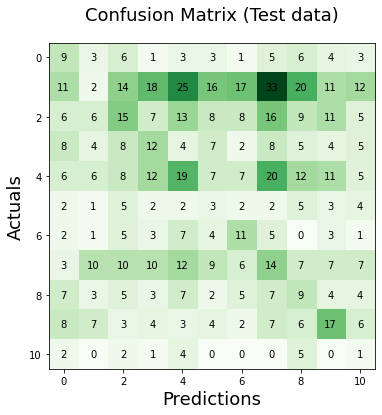

In [ ]:
train_pred = clf.predict(X_train_tfidf)
test_pred = clf.predict(X_test_tfidf)

evaluate_model(y_test, test_pred, 'Test data')

[Train data] model score: 0.6093509689326361
[Train data] model f1_score: 0.6260987097825969
[Train data] model precision: 0.604249818989192
[Train data] model recall: 0.7154762839841109


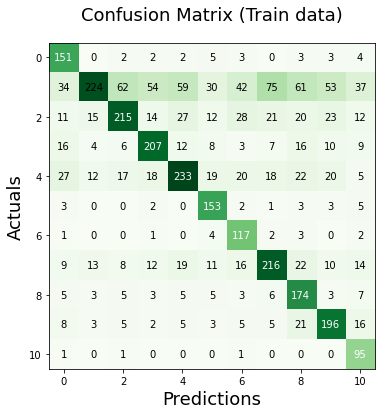

In [ ]:
evaluate_model(y_train, train_pred, 'Train data')

### Transformer Based classifier

In [ ]:
!pip install -U sentence-transformers
!pip install datasets

In [ ]:
X.shape, y.shape

((4064,), (4064,))

In [ ]:
X = data['poem']
y = data['chapter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews", num_labels=20)
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels=20)
# model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=20)
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=20)

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [ ]:
import os
os.makedirs('./transformer_data/', exist_ok=True)

f = open('./transformer_data/train_dataset.csv', 'w', encoding='utf-8')
f.write("text,label\n")
for x, label in zip(X_train, y_train):
    if x == '':
        print('hit')
        continue
    f.write(f'{x},{label}\n')
f.close()

f = open('./transformer_data/test_dataset.csv', 'w', encoding='utf-8')
f.write("text,label\n")
for x, label in zip(X_test, y_test):
    if x == '':
        print('hit')
        continue
    f.write(f'{x},{label}\n')
f.close()

In [ ]:
from datasets import load_dataset

train_poems = load_dataset('csv', data_files='./transformer_data/train_dataset.csv', sep=',', split='train')
train_poems = train_poems.train_test_split(test_size=0.15)

test_poems = load_dataset('csv', data_files='./transformer_data/test_dataset.csv', sep=',')

train_poems, test_poems

Using custom data configuration default-299b766a9956e791


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-299b766a9956e791/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


Using custom data configuration default-c5145e8ad3b84df0


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c5145e8ad3b84df0/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

(DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 5526
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 976
    })
}),
 DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1626
    })
}))

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_tokenized = train_poems.map(preprocess_function, batched=True)
test_tokenized = test_poems.map(preprocess_function, batched=True)

  0%|          | 0/6 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=8,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_tokenized["train"],
    eval_dataset=train_tokenized["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5526
  Num Epochs = 8
  Instantaneous batch size per device = 16
  Total train batch size (w. 

ValueError: ignored

### Transformer based classifier

In [ ]:
from sklearn.model_selection import train_test_split

#split test-train data

x_train, x_test, y_train, y_test = train_test_split(data['poem'], data['chapter'], test_size=0.20, random_state=2)
#x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

install required modules

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.4 MB 33.2 MB/s 
     |████████████████████████████████| 6.6 MB 53.6 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 


Pre-processing without tokenizing documents.

In [ ]:
x_train_processed = pre_process(x_train, remove_stopwords=True, MIN_COUNT=0)
x_train_processed = [' '.join(x) for x in x_train_processed]

x_test_processed = pre_process(x_test, remove_stopwords=True, MIN_COUNT=0)
x_test_processed = [' '.join(x) for x in x_test_processed]

#x_valid_processed = pre_process(x_valid, remove_stopwords=True, MIN_COUNT=0)
#x_valid_processed = [' '.join(x) for x in x_valid_processed]

In [ ]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weight, dtype=torch.float).to('cuda'))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

Use HooshvareLab(Parsbert) pretrained model to create a new classification model. Use cuda for faster runtime.

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'
classification_model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(data.chapter.value_counts()))

device = "cuda" if torch.cuda.is_available() else "cpu"
classification_model.to(device)

Downloading:   0%|          | 0.00/440 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

Define tokenizer from same pretrained model.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Creating datasets and use tokenizer to decode train, validation, and test data.

In [ ]:
import torch 

class PoemDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, encoder):
        self.encoding = encoder(data, truncation=True, padding=True)
        self.labels = labels.to_numpy()
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = PoemDataset(x_train_processed, y_train, tokenizer)
#valid_dataset = PoemDataset(x_valid_processed, y_valid, tokenizer)
test_dataset = PoemDataset(x_test_processed, y_test, tokenizer)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Setting training arguments for the model. use learning rate 1e-5 to avoid overfitting.

Then Train the model.

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,2.301400,2.230459,0.158672,0.077426,0.079129,0.124472
2,2.156600,2.163241,0.226322,0.113752,0.103275,0.167225
3,1.995500,2.158857,0.225092,0.122649,0.206837,0.171966
4,1.869200,2.173252,0.237392,0.147937,0.206599,0.188476
5,1.576200,2.198807,0.231242,0.154585,0.219033,0.190283
6,1.592600,2.184128,0.237392,0.154687,0.163260,0.196191


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

TrainOutput(global_step=1224, training_loss=1.9310528628187242, metrics={'train_runtime': 206.5525, 'train_samples_per_second': 94.436, 'train_steps_per_second': 5.926, 'total_flos': 160395592781376.0, 'train_loss': 1.9310528628187242, 'epoch': 6.0})

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.327300,2.271829,0.230012,0.152572,0.261030,0.190268
2,1.036800,2.449636,0.239852,0.185438,0.214017,0.191854
3,0.957800,2.609838,0.241082,0.195736,0.211085,0.206794
4,0.973400,2.750259,0.249692,0.194519,0.199560,0.205091
5,0.635400,2.826851,0.255843,0.211285,0.222914,0.212981
6,0.659100,2.818077,0.249692,0.209459,0.219950,0.210864


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

TrainOutput(global_step=1224, training_loss=0.9227766484216927, metrics={'train_runtime': 205.0536, 'train_samples_per_second': 95.126, 'train_steps_per_second': 5.969, 'total_flos': 160395592781376.0, 'train_loss': 0.9227766484216927, 'epoch': 6.0})

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.376000,3.028311,0.259533,0.225122,0.320266,0.223725
2,0.282100,3.366403,0.269373,0.226541,0.292280,0.230094
3,0.250600,3.621943,0.250923,0.196648,0.237283,0.202649
4,0.221800,3.659013,0.259533,0.223108,0.246213,0.227738
5,0.193600,3.781773,0.259533,0.212675,0.238192,0.212387
6,0.251800,3.681082,0.269373,0.236284,0.261140,0.238202


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-408
Configuration saved in ./results/checkpoint-408/config.json
Model weights saved in ./results/checkpoint-408/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-408/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-408/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-612
Configuration saved in ./results/checkpoint-612/config.json
Model weig

TrainOutput(global_step=1224, training_loss=0.24964038954645978, metrics={'train_runtime': 199.1053, 'train_samples_per_second': 97.968, 'train_steps_per_second': 6.148, 'total_flos': 160395592781376.0, 'train_loss': 0.24964038954645978, 'epoch': 6.0})

predict test data and evaluate the model and plot confusion matrix:

In [ ]:
pred = trainer.predict(test_dataset)
pred_y = pred.predictions.argmax(-1)

***** Running Prediction *****
  Num examples = 813
  Batch size = 16


[Transformer Based] model score: 0.2693726937269373
[Transformer Based] model f1_score: 0.23628392094830716
[Transformer Based] model precision: 0.26114046479187486
[Transformer Based] model recall: 0.2382022786116213


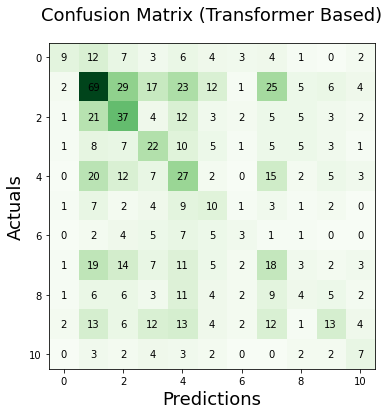

In [ ]:
evaluate_model(y_test, pred_y, 'Transformer Based')

# Phase 3: Link Anylysis

In [ ]:
# data = pd.concat([boostan_data, golestan_data], ignore_index=True).drop(columns = ['section', 'chapter'])
# it seems to work better on boostan only
data = boostan_data.drop(columns = ['section', 'chapter'])
data.head()

,poem
0,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفرین
1,خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش‌پذیر
2,عزیزی که هر کز درش سر بتافت\nبه هر در که شد هی...
3,سر پادشاهان گردن‌فراز\nبه درگاه او بر زمین نیاز
4,نه گردن‌کشان را بگیرد به فور\nنه عذرآوران را ب...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_data = tfidf.fit_transform(data.poem.to_numpy())
tfidf_data = tfidf_data.toarray()
tfidf_data.shape

(4064, 6893)

In [ ]:
similarity_matrix = np.matmul(tfidf_data, tfidf_data.T)
similarity_matrix.shape

(4064, 4064)

In [ ]:
threshold = 0.3

adj_matrix = (similarity_matrix > threshold).astype(int)
# do we need this?
adj_matrix -= np.eye(len(adj_matrix), dtype=int)
print(f'Number of links: {adj_matrix.sum()}')

Number of links: 4366


In [ ]:
import networkx as nx
adj_graph = nx.from_numpy_array(adj_matrix)
probabilities = nx.pagerank(adj_graph)

In [ ]:
max_idx = sorted(probabilities, key=probabilities.get, reverse=True)
probabilities[max_idx[0]]

0.003827895757140323

In [ ]:
for poem in data.poem[max_idx[0: 5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

که چشم از تو دارند مردم بسی
نه تو چشم داری به دست کسی

به روی من این در کسی کرد باز
که کردی تو بر روی وی در، فراز

یکی فتنه دید از طرف بر شکست
یکی در میان آمد و سر شکست

اگر هست مرد از هنر بهره‌ور
هنر خود بگوید نه صاحب هنر



<div dir='rtl'> 
<font face="B Nazanin">

تحلیل خروجی:
<br/>
ابتدا با ضرب ماتریس tfidfها در یک دیگر و به دست آوردن
ضرب داخلی سطرهای مختلف در هم، بر اساس بزرگ‌تر یا کوچک‌تر بودن شباهت نسبت به ترشهولد، ماتریس مجاورت را ایجاد کردیم.
<br/>
برای انتخاب ترشهولد مناسب، آن را به گونه‌ای تغییر دادیم که تعداد لینک‌هایی که بین ابیات مختلف وجود دارد، از اردر تعداد ابیات بوستان باشد.
در این صورت نه تعداد لینک‌ها بسیار زیاد است که احتمال‌ها خیلی نزدیک به یکدیگر شود و نه آن قدر کم است که امکان جابجا شدن از برخی ابیات وجود نداشته باشد.
<br/>
شعری که بیشترین احتمال را در الگوریتم
pagerank
دریافت می‌کند بیت 
«به نرمی ز دشمن توان کرد دوست / چو با دوست سختی کنی دشمن اوست»
است که یکی از پرتکرارترین مضامین موجود در بوستان سعدی است. که مضمون اصلی آن این است در هر کاری محبت و دوستی بسیار کارسازتر است از جنگ و دشمنی. و انسان خوب نباید حتی در برخورد با انسان‌های بد و دشمنانش نیز راه و رسم خود را کنار بگذارد و به بدی روی بیاورد. و با این کار حتی ممکن است دشمنان نیز دست از بدی کردن بکشند.
<br/>
با کمی جستجو در بوستان ابیات مشابه زیادی همچون این بیت می‌توانیم بیابیم:
<br/>
«همی تا برآید به تدبیر کار / مدارای دشمن به از کارزار»
<br/>
«چو کاری براید به لطف و خوشی / چه حاجت به تندی و گردنکشی»
<br/>
«گرت طبع من آمد ناسزاوار / تو خوی نیک خویش از دست مگذار»
<br/>
حتی در سعدی ابیات دیگری نیز دارد که در آن‌ها بیان می‌کند لطف و خشم هر یک به جای خود مناسب هستند و یا ابیاتی که بیان می‌کند باید با بدان به مانند خودشان بد بود (اغلب علت این ابیاتی که ممکن است جداگانه متناقض به نظر برسند این است که معمولا در یک حکایت افراد مختلف نظرات مختلفی درباره‌ی این موضوع بیان کرده‌اند). که این گونه ابیات نیز ارتباط تنگاتنگی با ابیات بالا دارند و با آن‌ها لینک می‌شوند. مانند ابیات زیر:
<br/>
«هر که را دشمن پیش است گر دکشد دشمن خویش است»
<br/>
«چو با سفله گویی به لطف و خوشی / فزون گرددش کبر و گردن کشی»
<br/>
«بگفتا نیک‌مردی کن نه چندان / که گردد خیره گرگ تیزدندان»
<br/>
«ترحم بر پلنگ تیزدندان / سمتمکاری بود بر گوسپندان»
<br/>
«درشتی و نرمی به‌هم‌در به است / جو رگ‌زن که جراح و مرهم‌نه است»
<br/>
«مبخشای بر هر کجا ظالمی‌ست / که رحمت بر او جور بر عالمی‌ست»
<br/>
«هر آن کس که بر دزد رحمت کند / به بازوی خود کاروان می‌زند»
<br/>
«جفاپیشگان را بده سر به باد / ستم بر ستم‌پیشه عدل است و داد»
<br/>
پس طبیعی است که این مضامین مرتبط و پرتکرار، ابیاتشان با هم لینک شود و 
random walker
ما با احتمال بیشتری در یکی از آن‌ها قرار بگیرد.

</div>

We use NetworkX HTIS algorithm to estimate hubs and authority of nodes.

In [ ]:
hubs, authority = nx.hits(adj_graph)

First we sort nodes based on their hubs and then print the 5 nodes with the most hubs.

In [ ]:
#  Based on hubs

max_idx = list(sorted(hubs, key=hubs.get, reverse=True))
hubs[max_idx[0]]

0.08391799304174069

In [ ]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

بود دشمنش تازه و دوست ریش
کسی کش بود دشمن از دوست بیش

چو دشمن به دشمن بود مشتغل
تو با دوست بنشین به آرام دل

بر این گفتم آن دوست دشمن گرفت
چو آتش شد از خشم و در من گرفت

مگر پیش دشمن بگویند و دوست
که این کشته دست و شمشیر اوست



Then we do the same thing based on authority to check if results are diffrent.

In [ ]:
#  Based on authority

max_idx = list(sorted(authority, key=authority.get, reverse=True))
authority[max_idx[0]]

0.08391799304174068

In [ ]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

بود دشمنش تازه و دوست ریش
کسی کش بود دشمن از دوست بیش

چو دشمن به دشمن بود مشتغل
تو با دوست بنشین به آرام دل

بر این گفتم آن دوست دشمن گرفت
چو آتش شد از خشم و در من گرفت

مگر پیش دشمن بگویند و دوست
که این کشته دست و شمشیر اوست




<div dir=rtl>
<font face="B Nazanin">

همانطور که میتوانسیتم انتظار آن را داشته باشیم نتایج حاصل شده توسط 
authority و hubs
با یکدیگر تفاوت ندارند چرا که گراف ساخته شده براساس شباهت‌ها دو طرفه است و به عبارتی ماتریس مجاورت آن متقارن می‌باشد. همینطور می‌توانیم ببینیم که در اینجا هم بیتی که بیشترین ارزش را دارد همان بیت «به نرم ز دشمن توان کرد دوست، چو با دوست سختی کنی دشمن اوست» می‌باشد. که در این‌جا به این معنیست که بیشترین مقدار یال‌ها به این راس می‌رسد و به نظر می‌رسد که مفهوم محبت و دوستی در ابیات سعدی بسیار به چشم می‌خورد و برجسته است.

</div>

## Transformer based

Using our phase one transformer model we create embedded vector of every poems.

In [ ]:
transformer_model = my_transformer(boostan_data['poem'])
transformer_vector = transformer_model.vectors

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

Then we normalize vectors and create similarity matrix and after that do the same process as tf-idf vectors.

In [ ]:
for i in range(len(transformer_vector)):
    transformer_vector[i] = transformer_vector[i] / np.linalg.norm(transformer_vector[i]) 

In [ ]:
similarity_matrix_transformer = np.matmul(transformer_vector, transformer_vector.T)
similarity_matrix_transformer.shape

(4064, 4064)

In [ ]:
threshold = 0.69

adj_matrix_transformer = (similarity_matrix_transformer > threshold).astype(int)
# do we need this?
adj_matrix_transformer -= np.eye(len(adj_matrix_transformer), dtype=int)
print(f'Number of links: {adj_matrix_transformer.sum()}')

Number of links: 355270


In [ ]:
import networkx as nx
adj_graph_transformer = nx.from_numpy_array(adj_matrix_transformer)
probabilities = nx.pagerank(adj_graph_transformer)

In [ ]:
max_idx = sorted(probabilities, key=probabilities.get, reverse=True)
probabilities[max_idx[0]]

0.002116671097428274

In [ ]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

زبان آمد از بهر شکر و سپاس
به غیبت نگرداندش حق شناس

زبان در نهندش به ایذا چو تیغ
که بدبخت زر دارد از خود دریغ

یکی شکر گفت اندران خاک و دود
که دکان ما را گزندی نبود

نیوشنده شد زین سخن تنگدل
به فکرت فرو رفت چون خر به گل

به پای بت اندر به امید خیر
بغلطید بیچاره بر خاک دیر



In [ ]:
hubs, authority = nx.hits(adj_graph_transformer)

In [ ]:
max_idx = list(sorted(hubs, key=hubs.get, reverse=True))
hubs[max_idx[0]]

0.0023943399138527713

In [ ]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به پای بت اندر به امید خیر
بغلطید بیچاره بر خاک دیر

یکی شکر گفت اندران خاک و دود
که دکان ما را گزندی نبود

زبان آمد از بهر شکر و سپاس
به غیبت نگرداندش حق شناس

زبان در نهندش به ایذا چو تیغ
که بدبخت زر دارد از خود دریغ

نیوشنده شد زین سخن تنگدل
به فکرت فرو رفت چون خر به گل




<div dir=rtl>
<font face="B Nazanin">

نتایج حاصل شده از روش HITS 
و 
PageRank
تفاوت چندانی با یکدیگر ندارند و می‌توانیم ببینیم که در روش PageRank
مفهوم «غیبت نکردن» را مفهموم برجسته‌ای در نظر گرفته است. که البته می‌توان دید که با ابیات دیگری که به ارزش زیادی برای آن تشخیص داده است شباهت زیادی نداشته است. در کل روش tf-idf
روش موثرتری برای ساختن ماتریس شباهت‌ها به نظر می‌آید. 

</div>

# Clustering

In [62]:
import numpy as np
from scipy.spatial.distance import cdist  # used to get distance matrix
import random

In [63]:
def get_distance_matrix(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return cdist(x, y, 'euclidean') ** 2

class K_means:

    def __init__(self, data: np.ndarray, number_of_clusters):
        self.data: np.ndarray = data
        self.number_of_clusters = number_of_clusters
        self.n, self.d = data.shape  # number of data points and feature size
        self.centers: np.ndarray = None  # set when fit is called
        self.predictions: np.ndarray = None  # set when fit is called

    def kmeans_plus_plus(self):
        centers = np.zeros((self.number_of_clusters, self.d))
        centers[0] = random.choice(self.data)
        for i in range(1, self.number_of_clusters):
            centers[i] = random.choices(self.data, weights=np.amin(get_distance_matrix(centers[:i], self.data), axis=0))[0]
        return centers

    def fit(self, max_number_of_iteration):
        predictions = None
        centers = self.kmeans_plus_plus()
        for i in range(max_number_of_iteration):
            predictions = get_distance_matrix(centers, self.data).argmin(axis=0)
            prev_centers = centers.copy()
            for j in range(self.number_of_clusters):
                cluster_j = self.data[predictions == j]
                if len(cluster_j) > 0:
                    centers[j] = cluster_j.mean(axis=0)

            if (prev_centers == centers).all():
                break

        self.centers = centers
        self.predictions = predictions
        return self.centers, self.predictions

    def get_distortion(self):  # aka: RSS
        return np.amin(get_distance_matrix(self.centers, self.data), axis=0).sum()

    def get_purity(self, labels):
        assert self.n == len(labels), "Number of labels must be equal to number of data"
        intersection = 0
        for j in range(self.number_of_clusters):
          j_labels = labels[self.predictions == j]
          values, counts = np.unique(j_labels, return_counts=True)
          intersection += np.max(counts)
        return intersection / self.n

    def predict(self, query):
        return get_distance_matrix(self.centers, [query])[:, 0].argmin()

### Using TF-IDF

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_data = tfidf.fit_transform(boostan_data['poem'])
tfidf_data = tfidf_data.toarray()

In [65]:
number_of_clusters = 11  # including its Introduction
tfidf_kmeans = K_means(tfidf_data, number_of_clusters)
tfidf_kmeans.fit(10000);

In [66]:
RSS = tfidf_kmeans.get_distortion()
purity = tfidf_kmeans.get_purity(boostan_data['chapter'].to_numpy())
print(f'RSS={RSS} and Purity={purity}')

RSS=3994.7457396000796 and Purity=0.22613188976377951


### Using Transformers

In [67]:
transformer_model = my_transformer(boostan_data['poem'])
transformer_vector = transformer_model.vectors

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

In [68]:
number_of_clusters = 11
transformer_kmeans = K_means(transformer_vector, number_of_clusters)
transformer_kmeans.fit(10000);

In [69]:
RSS = transformer_kmeans.get_distortion()
purity = transformer_kmeans.get_purity(boostan_data['chapter'].to_numpy())
print(f'RSS={RSS} and Purity={purity}')

RSS=635918.8680245179 and Purity=0.22760826771653545


So we will use TF-IDF for our main method for clustering.

In [70]:
boostan_data['cluster'] = tfidf_kmeans.predictions
boostan_data.head()

,poem,chapter,section,book,cluster
0,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفرین,0,1,Boostan,9
1,خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش‌پذیر,0,1,Boostan,9
2,عزیزی که هر کز درش سر بتافت\nبه هر در که شد هی...,0,1,Boostan,0
3,سر پادشاهان گردن‌فراز\nبه درگاه او بر زمین نیاز,0,1,Boostan,0
4,نه گردن‌کشان را بگیرد به فور\nنه عذرآوران را ب...,0,1,Boostan,0


We can get clusters (to show in UI) as follow:

In [71]:
clusters = boostan_data.groupby('cluster').apply(lambda x: x['poem'].to_numpy())
clusters

cluster
0     [عزیزی که هر کز درش سر بتافت\nبه هر در که شد ه...
1     [نگه دار یارب به چشم خودش\nبپرهیز از آسیب چشم ...
2     [الا تا نپیچی سر از عدل و رای\nکه مردم ز دستت ...
3     [ادیم زمین، سفرهٔ عام اوست\nبر این خوان یغما چ...
4     [نبینی در ایام او رنجه‌ای\nکه نالد ز بیداد سرپ...
5     [ندانم کدامین سخن گویمت\nکه والاتری زانچه من گ...
6     [اگر با پدر جنگ جوید کسی\nپدر بی‌گمان خشم گیرد...
7     [به دانش بزرگ و به همت بلند\nبه بازو دلیر و به...
8     [شنیدم که می‌گفت و باران دمع\nفرو می‌دویدش به ...
9     [به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آف...
10    [تأمل در آیینهٔ دل کنی\nصفایی به‌تدریج حاصل کن...
dtype: object

This function predicts to which cluster a BEIT belong and other BEITS in that cluster:

In [72]:
def predict_cluster(str):
  tfidf_str = tfidf.transform([str]).toarray()[0]
  i = tfidf_kmeans.predict(tfidf_str)
  return i, clusters[i]

In [73]:
predict_cluster('به نام خداوند جان‌آفرین')

(9, array(['به نام خداوندِ جان\u200cآفرین\nحکیمِ سخن\u200cدرزبان\u200cآفرین',
        'خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش\u200cپذیر',
        'ولیکن خداوند بالا و پست\nبه عصیان در رزق بر کس نبست',
        'به قدرت، نگهدار بالا و شیب\nخداوند دیوان روز حسیب',
        'چو این کاخ دولت بپرداختم\nبر او ده در از تربیت ساختم',
        'غم از گردش روزگارت مباد\nوز اندیشه بر دل غبارت مباد',
        'اتابک محمد شه نیکبخت\nخداوند تاج و خداوند تخت',
        'جوان جوان\u200cبخت روشن\u200cضمیر\nبه دولت جوان و به تدبیر پیر',
        'زهی دولت مادر روزگار\nکه رودی چنین پرورد در کنار',
        'زهی چشم دولت به روی تو باز\nسر شهریاران گردن فراز',
        'غم از دشمن ناپسندش مباد\nوز اندیشه بر دل گزندش مباد',
        'زهی دین و دانش، زهی عدل و داد\nزهی ملک و دولت که پاینده باد',
        'زهی بندگان را خداوندگار\nخداوند را بندهٔ حق گزار',
        'درآمد به ایوان شاهنشهی\nکه بختت جوان باد و دولت رهی',
        'ز روشن دلش ملک پرتو گرفت\nوزیر کهن را غم نو گرفت',
        'سفر کردگان لاابالی زیند\nکه پرور

Also we need to do clustering based on complete poems!

In [74]:
file_based_boostan = boostan_data.groupby(['chapter', 'section']).apply(lambda f: '\n'.join(f['poem'].tolist())).reset_index()
file_based_boostan.columns = ['chapter', 'section', 'poem']
file_based_boostan.head()

,chapter,section,poem
0,0,1,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفر...
1,0,2,کریم السجایا جمیل الشیم\nنبی البرایا شفیع الام...
2,0,3,در اقصای عالم بگشتم بسی\nبه سر بردم ایام با هر...
3,0,4,مرا طبع از این نوع خواهان نبود\nسر مدحت پادشاه...
4,0,5,اتابک محمد شه نیکبخت\nخداوند تاج و خداوند تخت\...


In [75]:
file_tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
file_tfidf_data = file_tfidf.fit_transform(file_based_boostan['poem'])
file_tfidf_data = file_tfidf_data.toarray()

In [76]:
file_tfidf_kmeans = K_means(file_tfidf_data, number_of_clusters)
file_tfidf_kmeans.fit(10000);

In [77]:
RSS = file_tfidf_kmeans.get_distortion()
purity = file_tfidf_kmeans.get_purity(file_based_boostan['chapter'].to_numpy())
print(f'RSS={RSS} and Purity={purity}')

RSS=211.75246988305068 and Purity=0.2565217391304348


Purity improved after we changed our clustering model to operate based on whole poems.

We use TSNE to plot graph of our clustering in two dimenstions:

In [78]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
sne_2d = tsne.fit_transform(file_tfidf_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


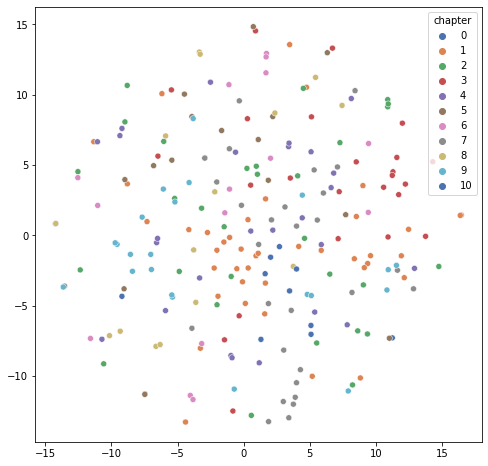

In [80]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=sne_2d.T[0], y=sne_2d.T[1], hue=file_based_boostan['chapter'], palette="deep");

As you can see, there is no particular relation between datapoints (poems) in the same chapter and this shows why our clustering doesn't have a good purity.